# Домашнее задание 2
## Задание 1
1. Реализовать kmeans
2. Визуализировать сходимость центров кластеров
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

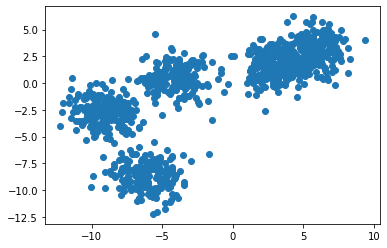

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [17]:
from sklearn.base import BaseEstimator, ClusterMixin
from numpy.linalg import norm
import numpy as np

class Kmeans(BaseEstimator, ClusterMixin): 

    def __init__(self, k=3, metric='euclidean', max_iter=300, random_state=17, init='random'):
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        np.random.seed(self.random_state)
        self.labels = np.empty(X.shape[0])
        self.centroids = np.empty((self.k, X.shape[1]))
        if self.init == 'k-means':
            self.k_means(X, y)
        else:
            self.centroids = X[np.random.choice(X.shape[0], self.k)]
        for it in xrange(self.max_iter):
            check = np.zeros(X.shape[0])
            quantity = np.ones((self.k, 1))
            centr_sum = np.zeros((self.k, X.shape[1]))                
            for i, x in enumerate(X):
                min_dist = norm(x - self.centroids[0])
                min_num = 0
                for j, centr in enumerate(self.centroids):
                    if min_dist > norm(x - centr):
                        min_dist = norm(x - centr)
                        min_num = j
                if (self.labels[i] != min_num):
                    self.labels[i] = min_num
                    check[i] = 1.
                quantity[min_num] += 1
                centr_sum[min_num] += x
            if sum(check) == 0:
                break
            self.centroids = centr_sum / quantity                
        return self

    def k_means(self, X, y=None):
        self.centroids[0] = X[np.random.randint(X.shape[0])]
        distance = np.empty(X.shape[0])
        for i, centr in enumerate(self.centroids):
            if i == 0:
                continue
            all_sum = 0.
            for j, x in enumerate(X):
                min_dist = norm(x - self.centroids[0])
                for k in xrange(1, i):
                    dist = norm(x - self.centroids[k])
                    if min_dist > dist:
                        min_dist = dist
                distance[j] = min_dist
                all_sum += min_dist
            rand_sum = np.random.random() * all_sum
            some_sum = 0.
            for j, x in enumerate(X):
                some_sum += distance[j]
                if some_sum > rand_sum:
                    centr = X[j]
                    break
        return self
        
    def predict(self, X, y=None):
        return self.labels

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=1.2, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=17)

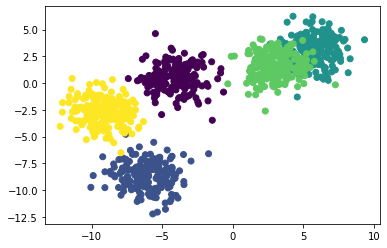

In [23]:
plt.scatter(X[:,0], X[:, 1], c=y)

## Задание 2
1. Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)
2. Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров
3. Произведите анализ получившихся кластеров:

Пример: первый кластер содержит полноприводные автомобили немецкого производства с АКПП, небольшим пробегом и высокой стоимостью, второй - японцы с правым рулём ...

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('2.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])

In [32]:
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Состояние     35019 non-null  object 
 3   Пробег        35019 non-null  float64
 4   Объем         35019 non-null  float64
 5   Топливо       35019 non-null  object 
 6   Мощность      35019 non-null  float64
 7   Кузов         35019 non-null  object 
 8   Привод        35019 non-null  object 
 9   КПП           35019 non-null  object 
 10  Руль          35019 non-null  object 
 11  Хозяев в ПТС  35019 non-null  object 
 12  Цена          35019 non-null  float64
dtypes: float64(5), object(8)
memory usage: 3.7+ MB


In [34]:
df["Марка"].value_counts()

ВАЗ                5497
Toyota             2700
Nissan             2064
Hyundai            1897
Volkswagen         1885
                   ... 
Renault Samsung       1
DongFeng              1
Hawtai                1
Oldsmobile            1
ВИС                   1
Name: Марка, Length: 92, dtype: int64

In [35]:
df["Год"].value_counts()

2008.0    3761
2012.0    3376
2007.0    3254
2011.0    3197
2013.0    2691
2006.0    2280
2010.0    2094
2014.0    1619
2005.0    1451
2004.0    1443
2009.0    1225
2003.0    1140
2001.0    1034
2002.0     966
2015.0     849
2000.0     845
1999.0     639
1998.0     580
1997.0     569
2016.0     445
1996.0     338
1995.0     262
1993.0     260
1994.0     226
1992.0     192
1991.0     155
1990.0     108
2017.0      20
Name: Год, dtype: int64

In [36]:
df["Кузов"].value_counts()

седан          14241
хэтчбек         8462
кроссовер       4980
внедорожник     3359
универсал       1893
минивэн         1188
купе             519
пикап            314
кабриолет         31
лимузин           26
родстер            6
Name: Кузов, dtype: int64

In [37]:
df["Привод"].value_counts()

передний    23933
полный       8481
задний       2605
Name: Привод, dtype: int64

In [38]:
df.describe()

,Год,Пробег,Объем,Мощность,Цена
count,35019.000000,35019.000000,35019.000000,35019.000000,3.501900e+04
mean,2007.370056,120830.338559,1877.595020,128.989606,4.889877e+05
std,5.332053,69805.918666,617.729308,52.277648,4.765761e+05
min,1990.000000,5.000000,100.000000,1.000000,8.000000e+03
25%,2004.000000,70000.000000,1500.000000,90.000000,1.900000e+05
50%,2008.000000,110000.000000,1600.000000,116.000000,3.700000e+05
75%,2012.000000,160000.000000,2000.000000,150.000000,6.200000e+05
max,2017.000000,363000.000000,4600.000000,333.000000,6.900000e+06


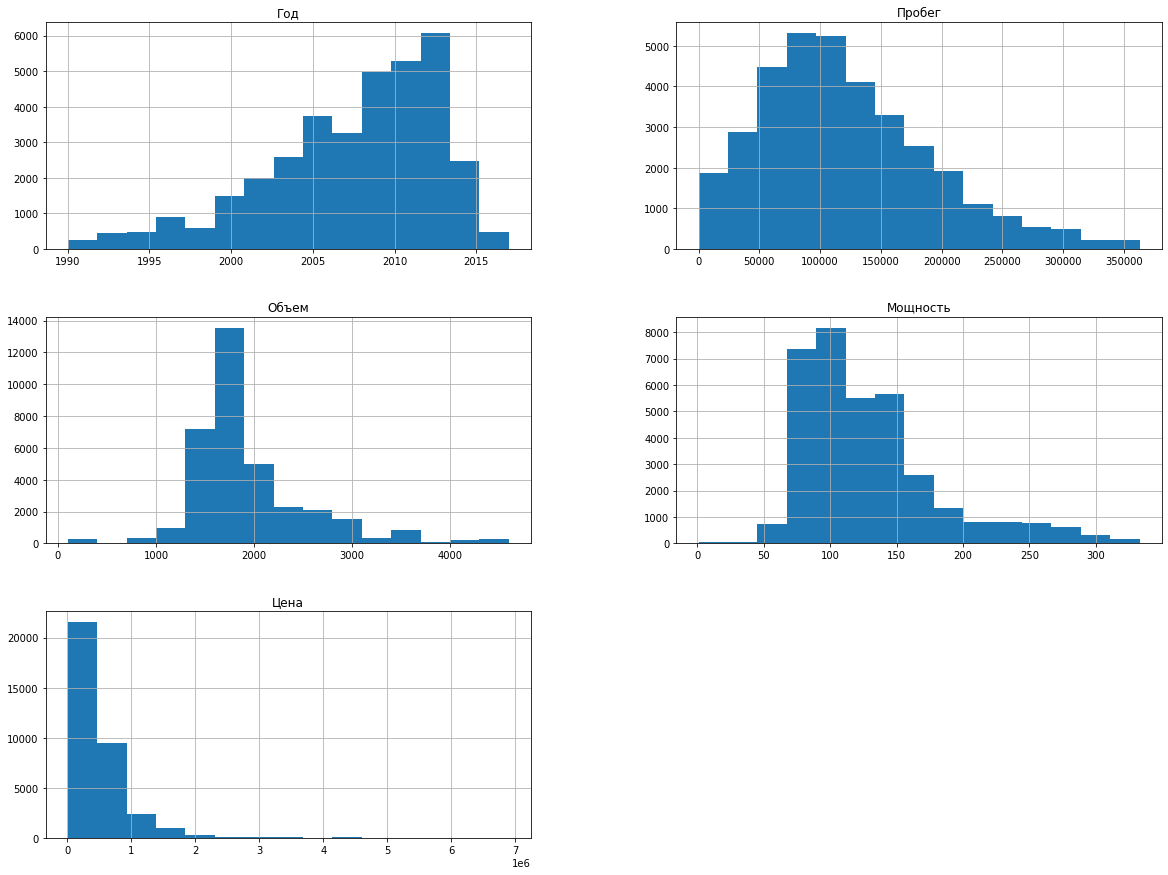

In [44]:
df.hist(bins = 15, figsize = (20, 15))
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer


In [71]:
print('Количество строк = ', df.shape[0])
print('Количество колонок = ', df.shape[1])

Количество строк =  35019
Количество колонок =  13
